In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.cuda.is_available())

False


In [5]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [6]:
print(f"Shape of train dataset is {df_train.shape} and of test dataset is {df_test.shape}")

Shape of train dataset is (60000, 785) and of test dataset is (10000, 785)


In [7]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [23]:
X_train.shape

(60000, 784)

In [24]:
y_train.shape

(60000,)

In [25]:
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
class custom_dataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [28]:
train_dataset = custom_dataset(X_train, y_train)
test_dataset = custom_dataset(X_test, y_test)

In [29]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False
)

In [33]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=10,):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(2),
            
            nn.Conv2d(6,16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(2)     
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*4*4, 120),
            nn.Tanh(),
            
            nn.Linear(120,84),
            nn.Tanh(),
            
            nn.Linear(84, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
        
        

In [34]:
EPOCHS = 100

LEARNING_RATE = 0.1

model = LeNet5(X_train.shape[1])

#loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), LEARNING_RATE)

In [40]:
model = LeNet5()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

EPOCHS = 30

for EPOCH in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch_features, batch_labels in train_dataloader:

        
        batch_features = batch_features
        batch_labels = batch_labels

        
        batch_features = batch_features.view(-1, 1, 28, 28)

        
        outputs = model(batch_features)

        loss = loss_fn(outputs, batch_labels)

        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {EPOCH+1} | Loss: {total_loss/len(train_dataloader):.4f}")


Epoch 1 | Loss: 0.2616
Epoch 2 | Loss: 0.0903
Epoch 3 | Loss: 0.0625
Epoch 4 | Loss: 0.0503
Epoch 5 | Loss: 0.0389
Epoch 6 | Loss: 0.0339
Epoch 7 | Loss: 0.0260
Epoch 8 | Loss: 0.0237
Epoch 9 | Loss: 0.0210
Epoch 10 | Loss: 0.0178
Epoch 11 | Loss: 0.0167
Epoch 12 | Loss: 0.0133
Epoch 13 | Loss: 0.0135
Epoch 14 | Loss: 0.0118
Epoch 15 | Loss: 0.0106
Epoch 16 | Loss: 0.0097
Epoch 17 | Loss: 0.0095
Epoch 18 | Loss: 0.0089
Epoch 19 | Loss: 0.0089
Epoch 20 | Loss: 0.0065
Epoch 21 | Loss: 0.0093
Epoch 22 | Loss: 0.0071
Epoch 23 | Loss: 0.0068
Epoch 24 | Loss: 0.0069
Epoch 25 | Loss: 0.0060
Epoch 26 | Loss: 0.0082
Epoch 27 | Loss: 0.0045
Epoch 28 | Loss: 0.0051
Epoch 29 | Loss: 0.0078
Epoch 30 | Loss: 0.0057


In [44]:
def test_accuracy(model, loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for x, y in loader:
            x = x.view(-1,1,28,28)
            y = y

            pred = model(x).argmax(1)

            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total


In [46]:
test_accuracy(model, test_dataloader)

0.9862

In [47]:
test_accuracy(model, train_dataloader)

0.9987

In [48]:
import numpy as np

losses = np.array([
    0.2616, 0.0903, 0.0625, 0.0503, 0.0389,
    0.0339, 0.0260, 0.0237, 0.0210, 0.0178,
    0.0167, 0.0133, 0.0135, 0.0118, 0.0106,
    0.0097, 0.0095, 0.0089, 0.0089, 0.0065,
    0.0093, 0.0071, 0.0068, 0.0069, 0.0060,
    0.0045, 0.0051, 0.0078, 0.0057
])

epochs = np.arange(1, len(losses)+1)


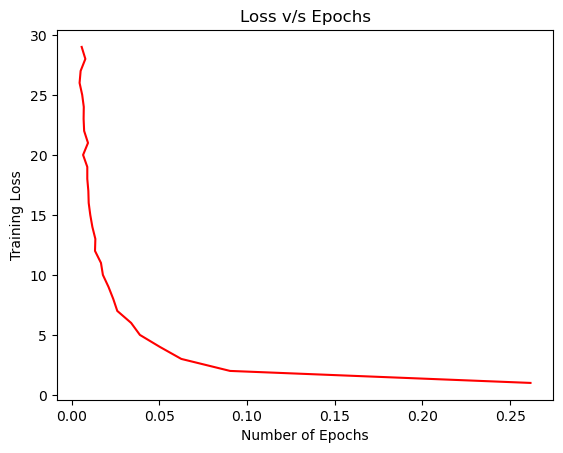

In [55]:
plt.plot(losses, epochs, color = 'red')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Loss v/s Epochs")
plt.show()